In [1]:
from pathlib import Path
from fastai import *
from fastai.vision import *
import torch
from fastai.callbacks.hooks import *
from tqdm import tqdm_notebook
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import glob

## Seed result

In [2]:
seed_value = 42
np.random.seed(seed_value) # numpy
torch.manual_seed(seed_value) # cpu  vars
random.seed(seed_value) # Python

## create and load data

In [3]:

data = ImageDataBunch.from_folder(path, 
                                  train= path,
                                  valid_pct= 0.2,
                                  ds_tfms= get_transforms(), 
                                  size= 229,
                                  num_workers= 7,
                                  bs = 16,
                                  ).normalize(imagenet_stats)

In [4]:
data.classes

['0', '1']

## Test ImageDataBunch

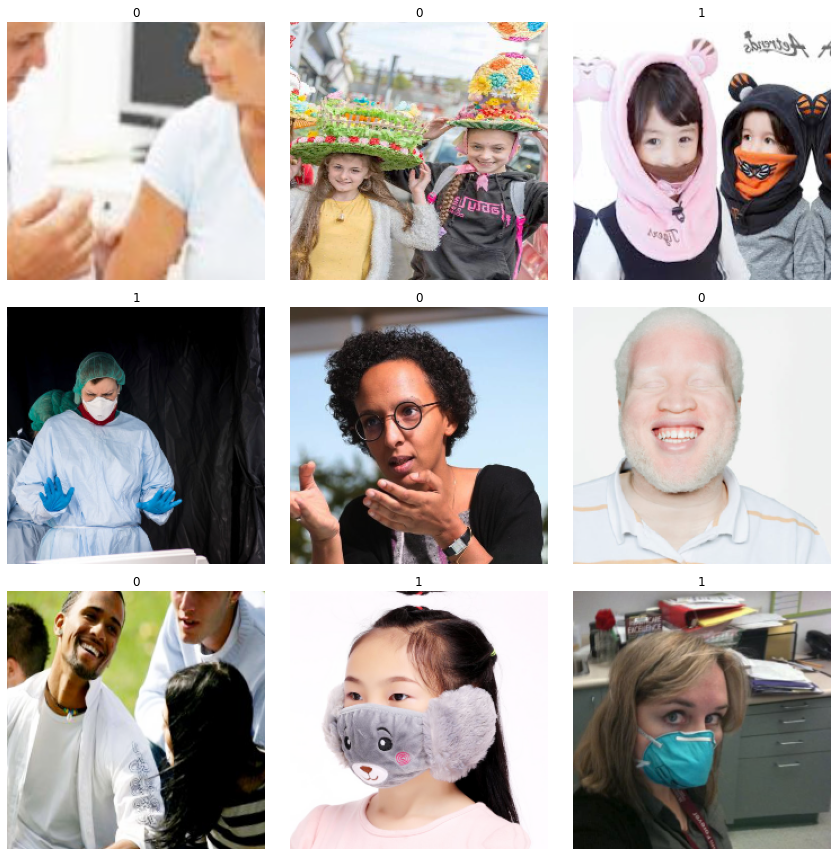

In [5]:
data.show_batch(rows= 3, figsize= (12, 12))

## Create Model
- model based resnet101
- prepared transfert learning

In [6]:
from fastai.metrics import error_rate

learn = cnn_learner(data= data, base_arch= models.resnet101, metrics= [error_rate, accuracy],
                    callback_fns= ShowGraph)

## Training

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-04
Min loss divided by 10: 1.91E-03


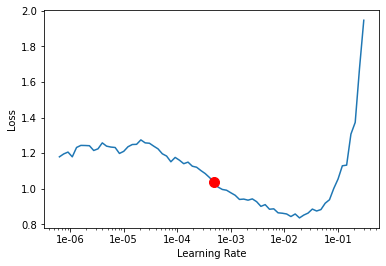

In [7]:
np.random.seed(42)
learn.freeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.052369,0.110300,0.030651,0.969349,14:01
1,0.090569,0.134764,0.042146,0.957854,14:22
2,0.085003,0.262458,0.038314,0.961686,14:27
3,0.065109,0.090193,0.019157,0.980843,14:33
4,0.081733,0.092217,0.019157,0.980843,14:29


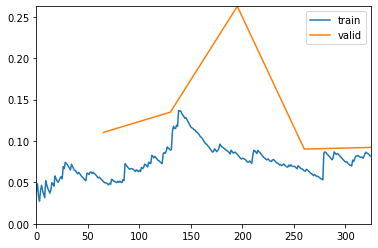

In [21]:
defaults.device = torch.device('cpu') 
learn.fit_one_cycle(5, slice(1e-5,1e-3))

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

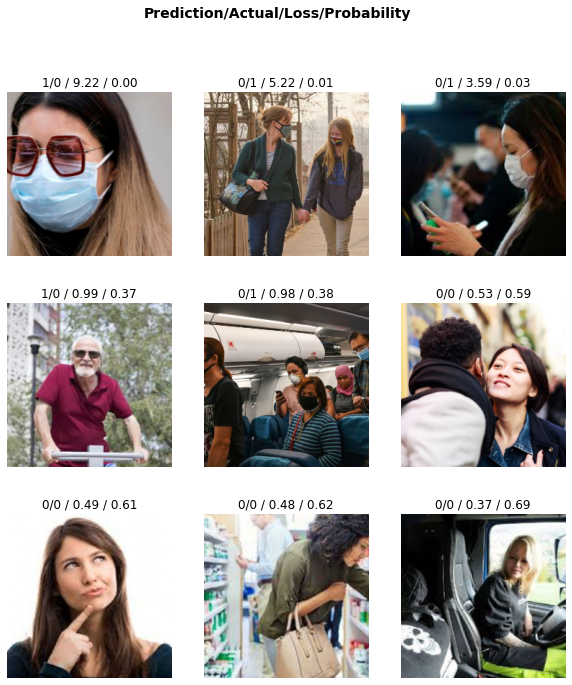

In [23]:
interp.plot_top_losses(9, figsize=(10,11))

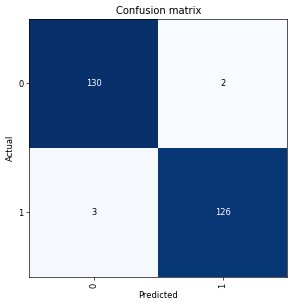

In [24]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

## Save Model

In [25]:
learn.export(file= Path("faceMasksDetection.pkl"))

## Test Model

In [ ]:
model = load_learner("", "faceMasksDetection.pkl")

In [ ]:
img = open_image("test.jpg")

In [ ]:
log_pred = model.predict(img)